In [ ]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading and examining the dataset
penguins_df = pd.read_csv("dataset.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
penguins_dummy = pd.get_dummies(penguins_df['sex'])
penguins = pd.concat([penguins_df.drop('sex', axis=1), penguins_dummy], axis=1)
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


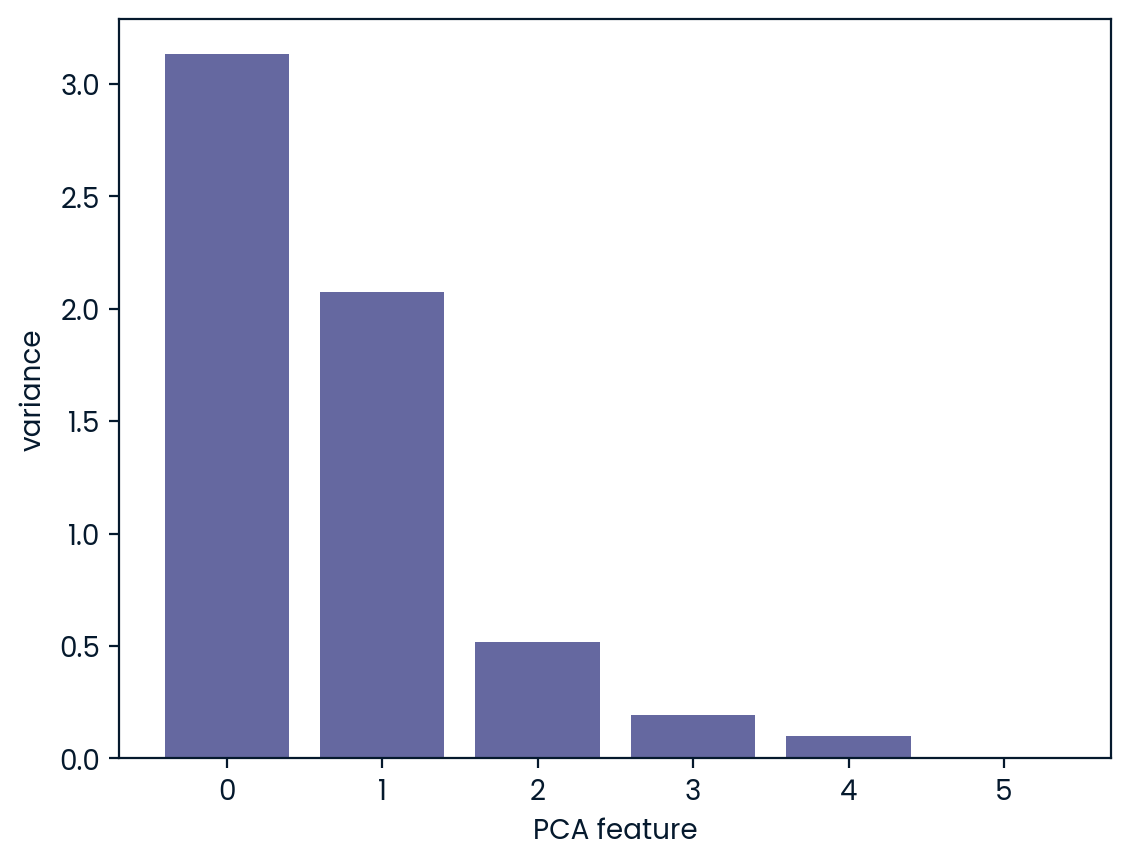

In [ ]:
# Create scaler: scaler
scaler = StandardScaler()

# Scale the the features: penguins_scaled
penguins_scaled = scaler.fit_transform(penguins)

# Create PCA instance: pca
pca = PCA()

# Fit the pipeline to 'samples'
pca.fit(penguins_scaled)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

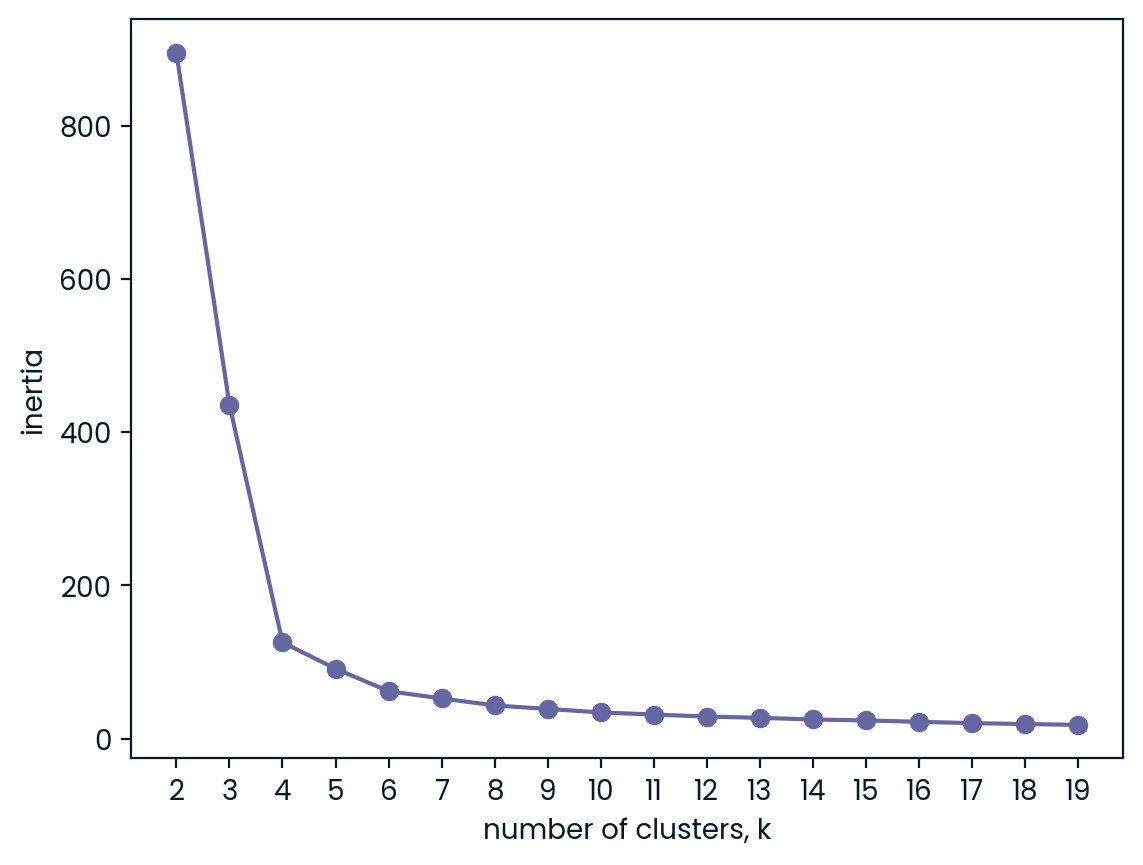

In [5]:
pca = PCA(n_components=2)

penguins_PCA = pca.fit_transform(penguins_scaled)

ks = range(2, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: kmeans
    kmeans = KMeans(n_clusters = k)
    
    # Fit model to samples
    kmeans.fit(penguins_PCA)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

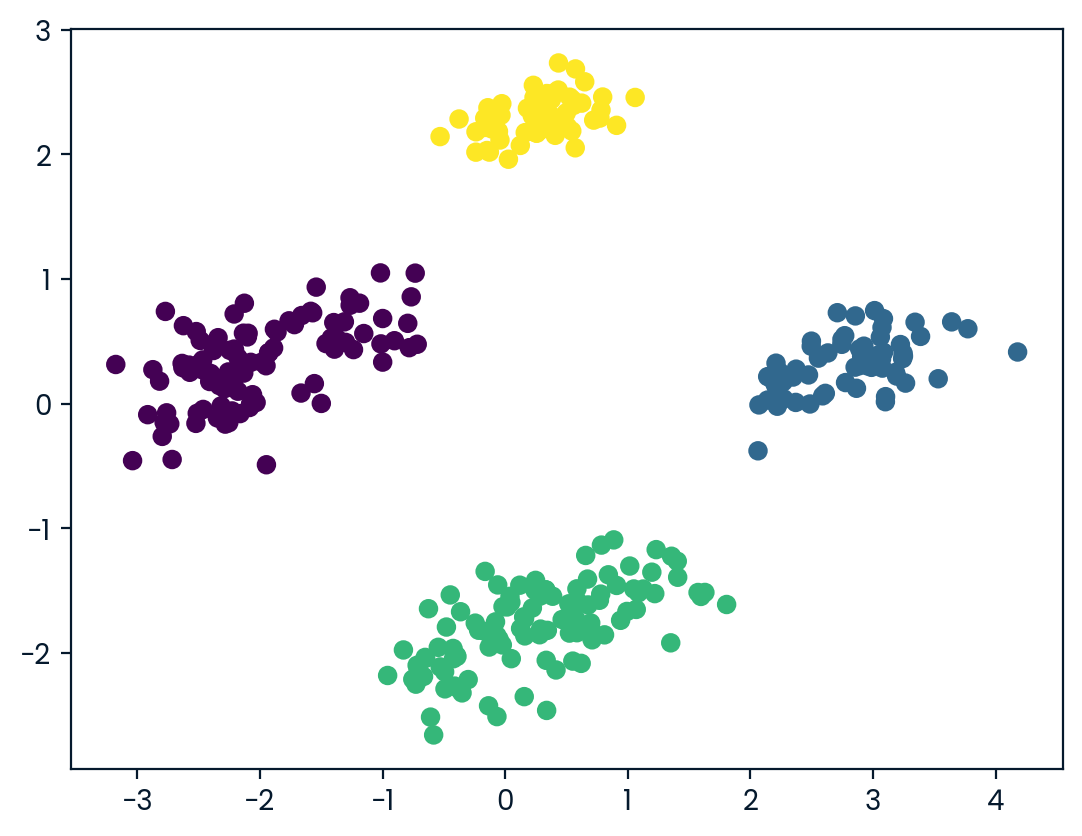

In [6]:
# 4 is the best # of clusters
kmeans = KMeans(n_clusters=4)

kmeans.fit(penguins_PCA)

plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c=kmeans.labels_)

In [7]:
penguins['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
                  'label']
stat_penguins = penguins[numeric_columns].groupby('label').mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,40.217757,17.611215,189.046729
1,49.473770,15.718033,221.540984
2,43.878302,19.111321,194.764151
3,45.563793,14.237931,212.706897
